In [1]:
#Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.metrics import matthews_corrcoef
from sklearn import linear_model 

In [2]:
#Import CSV files
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#To remove duplicates item in data sets
df.drop_duplicates(inplace=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#To check whether this data set have any missing values
pd.isna(df).sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#To check how many values in each attributes
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
#To check any missing values in data sets
df.isnull().values.any()

False

In [7]:
#To check overall of each attributes in the dataframe
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [8]:
#To checkoverall view of the correlation coeeficient in the dataframe
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Q1: What's the population for this data set? How many person who had heart disease? What's the percentage in this population?

In [9]:
#Total number of Heart Disease in histogram
fig_number_of_heart_disease = px.histogram(df, x="HeartDisease",title="Total Number of Heart Disease",text_auto=True, width=500, height=600,color=("HeartDisease"))
fig_number_of_heart_disease.update_layout(bargap=0.1)
fig_number_of_heart_disease.update_traces(textposition="outside")
fig_number_of_heart_disease.update_xaxes(nticks=3)
fig_number_of_heart_disease.show()
# 0 represent not diagnosed for heart disease
# 1 represent diagnosed for heart disease

In [10]:
#Pie Chart of total number of heart disease in %
labels_1 = df['HeartDisease'].value_counts().index
values_1 = df['HeartDisease'].value_counts().values
figpie_total_number_percentage = px.pie(df, values=values_1, names=labels_1,title="Total Number of Heart Disease in Percentage",width=500, height=600)
figpie_total_number_percentage.update_traces(textposition='inside', textinfo='percent+value')
figpie_total_number_percentage.show()
# 0 represent not diagnosed for heart disease
# 1 represent diagnosed for heart disease

# Q2: Do Male gender tend to easily to get heart disease compared to the Female gender?

In [11]:
#Total number of gender category in histogram
fig_number_of_gender = px.histogram(df, x="Sex",title="Total Male & Female Population",text_auto=True, width=500, height=600,color=("Sex"))
fig_number_of_gender.update_layout(bargap=0.1)
fig_number_of_gender.update_traces(textposition="outside")
fig_number_of_gender.update_xaxes(nticks=3)
fig_number_of_gender.show()

In [12]:
#Pie Chart of gender in %
labels_1 = df['Sex'].value_counts().index
values_1 = df['Sex'].value_counts().values
figpie_total_number_percentage = px.pie(df, values=values_1, names=labels_1,title="Total Male & Femele in population in %",width=500, height=600)
figpie_total_number_percentage.update_traces(textposition='inside', textinfo='percent+value')

In [13]:
#Total Heart Disease filtered by Gender in histogram
fig_heart_disease_by_gender = px.histogram(df, x="HeartDisease",color="Sex",title="Number of Heart Disease Filtered By Gender",text_auto=True, width=500, height=600,barmode="group")
fig_heart_disease_by_gender.update_layout(bargap=0.1)
fig_heart_disease_by_gender.update_xaxes(nticks=3)
fig_heart_disease_by_gender.update_traces(textposition="outside")
fig_heart_disease_by_gender.show()
# 0 represent not diagnosed for heart disease
# 1 represent diagnosed for heart disease
# M represent Male
# F represent Female

In [14]:
# To create a dataframe that only consists of male or female only.
df_male = df.loc[df["Sex"] =="M"]
df_female = df.loc[df["Sex"] =="F"]

In [80]:
#Pie Chart of total number of heart disease in Male Category %
figpie_male = px.pie(df_male,names="HeartDisease",title="Number of Heart Disease in Male Category in Percentage",width=600, height=600)
figpie_male.update_traces(textposition='inside', textinfo='percent+value')
figpie_male.show()
# 0 represent not diagnosed for heart disease
# 1 represent diagnosed for heart disease

In [81]:
#Pie Chart of total number of heart disease in Female Category %
figpie_female = px.pie(df_female,names="HeartDisease",title="Number of Heart Disease in Female Category in Percentage",width=600, height=600)
figpie_female.update_traces(textposition='inside', textinfo='percent+value')
figpie_female.show()
# 0 represent not diagnosed for heart disease
# 1 represent diagnosed for heart disease

# Q3: Can Chest Pain Category can contribute to heart disease?

In [17]:
#Check total data type in Chest Pain Type Category
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [18]:
#Total Heart Disease filtered by type of chest pain in histogram
fig_heart_disease_by_chestpaintype = px.histogram(df, x="ChestPainType",color="HeartDisease",title="Number of Heart Disease Filtered By Chest Pain Type",text_auto=True, width=500, height=600,barmode="group")
fig_heart_disease_by_chestpaintype.update_layout(bargap=0.1)
fig_heart_disease_by_chestpaintype.update_xaxes(nticks=5)
fig_heart_disease_by_chestpaintype.update_traces(textposition="outside")
fig_heart_disease_by_chestpaintype.show()
# 0 represent not diagnosed for heart disease
# 1 represent diagnosed for heart disease

In [19]:
#To categorize heart diease into 2 category - Diagnosed heart disease & dont have heart disease
df_HeartDisease_1 = df.loc[df["HeartDisease"] ==1]
df_HeartDisease_0 = df.loc[df["HeartDisease"] ==0]

In [20]:
#Pie Chart of chest pain type that contribute heart disease in %
figpie_chestpain = px.pie(df_HeartDisease_1,names="ChestPainType",title="Chest Pain Type Contribute Heart Disease",category_orders={"ChestPainType":["ATA","NAP","ASY","TA"]},width=600, height=600)
figpie_chestpain.update_traces(textposition='inside', textinfo='percent+value')
figpie_chestpain.show()
#ATA - Atypical Angina
#NAP - Non Angina Pain
#ASY - Asymptomatic
#TA - Typical Angina

In [21]:
#Pie Chart of chest pain type that didnt contribute heart disease in %
figpie_chestpain_2 = px.pie(df_HeartDisease_0,names="ChestPainType",title="Chest Pain Type that didnt contribute Heart Disease",category_orders={"ChestPainType":["ATA","NAP","ASY","TA"]},width=600, height=600)
figpie_chestpain_2.update_traces(textposition='inside', textinfo='percent+value')
figpie_chestpain_2.show()
#ATA - Atypical Angina
#NAP - Non Angina Pain
#ASY - Asymptomatic
#TA - Typical Angina

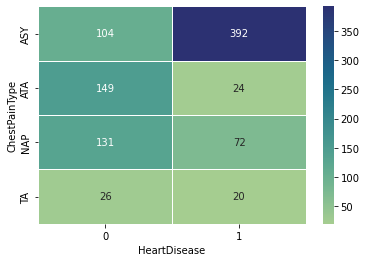

In [22]:
#Heatmap to see correlation of type of chest pain and heart disease
sns.heatmap(data=pd.crosstab(df["ChestPainType"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()

# Q4: Does Age go higher will lead to get heart disease?

In [23]:
#Check total data type in Age group
df["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

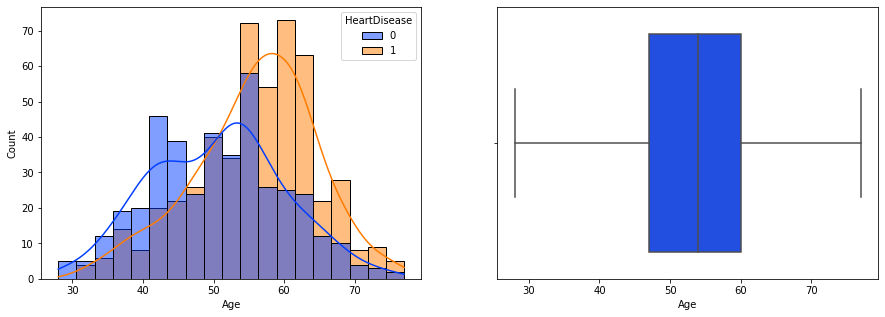

In [24]:
# Compare age and Heart disease
fig_age_heart_disease, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df, x="Age", hue="HeartDisease",kde=True,ax=axes[0],palette="bright")
sns.boxplot(x=df.Age,ax=axes[1],palette="bright")
plt.show()

In [25]:
#To Check correlation coefficient by applying Point biserial’s correlation
y1 = df["Age"].tolist()
x1 = df["HeartDisease"].tolist()

stats.pointbiserialr(x=x1, y=y1)

PointbiserialrResult(correlation=0.28203850581899687, pvalue=3.007953240047636e-18)

In [26]:
#Scatterplot & boxplot to see the correlation
fig_age_box_plot=px.box(df, x="HeartDisease", y="Age", points="all",width=800, height=500)
fig_age_box_plot.show()

In [27]:
### To Get the Odds of having heart disease when getting one year old older.###

# 1. To change the datatype of age group to float and reshape to -1 to 1
df_predict=df.astype({"Age":float})
Age=np.array(df_predict["Age"]).reshape(-1,1)
Heart_Disease=np.array(df["HeartDisease"])

In [28]:
# 2. To predict the odds by applying logistic regression
logr=linear_model.LogisticRegression()
logr.fit(Age,Heart_Disease)

LogisticRegression()

In [29]:
# 3. To predict age at 55 whether can get heart disease
prediction=logr.predict(np.array([55.0]).reshape(-1,1))
print(prediction)

[1]


In [30]:
# 4. To predict age at 40 whether can get heart disease
prediction2=logr.predict(np.array([40.0]).reshape(-1,1))
print(prediction2)

[0]


In [31]:
# 5. To get the odds of getting heart disease
log_odds=logr.coef_
odds=np.exp(log_odds)
print(odds)
#The odds of getting heart disease will increase 1.06% every each age increase.

[[1.06644594]]


# Q5: Does higher cholesterol can lead to have heart disease?

In [32]:
#Check variables in Cholesterol group
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [33]:
#Counts of total zero in Cholesterol column
count_zero_value_cholesterol=(df['Cholesterol']==0).sum()
count_zero_value_cholesterol

172

In [34]:
#Calculate mean of the cholesterol
df["Cholesterol"].mean()

198.7995642701525

In [35]:
#Replace zero value in Cholesterol column with mean value
for cholesterol in df["Cholesterol"]:
    cholesterol_mean = df["Cholesterol"].mean()
    df["Cholesterol"]=df["Cholesterol"].replace(0,cholesterol_mean)

In [36]:
#Check whether got any zero value
count_zero_value_cholesterol_replace_with_mean=(df['Cholesterol']==0).sum()
count_zero_value_cholesterol_replace_with_mean

0

In [37]:
#Recheck variables in Cholesterol group
df['Cholesterol'].unique()

array([289.        , 180.        , 283.        , 214.        ,
       195.        , 339.        , 237.        , 208.        ,
       207.        , 284.        , 211.        , 164.        ,
       204.        , 234.        , 273.        , 196.        ,
       201.        , 248.        , 267.        , 223.        ,
       184.        , 288.        , 215.        , 209.        ,
       260.        , 468.        , 188.        , 518.        ,
       167.        , 224.        , 172.        , 186.        ,
       254.        , 306.        , 250.        , 177.        ,
       227.        , 230.        , 294.        , 264.        ,
       259.        , 175.        , 318.        , 216.        ,
       340.        , 233.        , 205.        , 245.        ,
       194.        , 270.        , 213.        , 365.        ,
       342.        , 253.        , 277.        , 202.        ,
       297.        , 225.        , 246.        , 412.        ,
       265.        , 182.        , 218.        , 268.  

In [38]:
#Create a new column to determine cholesterol level
def_cholesterol=[]
for cholesterol in df["Cholesterol"]:
    if cholesterol >240:
        def_cholesterol.append("High")
    elif cholesterol <239 and cholesterol>200:
        def_cholesterol.append("Borderline High")
    else:
        def_cholesterol.append("Normal")

df["Cholesterol Level"]=def_cholesterol
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol Level
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Normal
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,High
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Borderline High
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,High
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,Normal
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,Normal
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,Borderline High


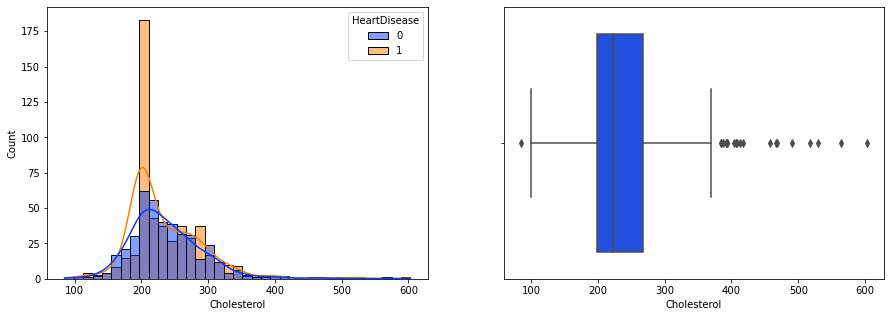

In [39]:
# Compare cholesterol and heart disease
fig_cholesterol_heart_disease, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",kde=True,ax=axes[0],palette="bright")
sns.boxplot(x=df.Cholesterol,ax=axes[1],palette="bright")
plt.show()

In [40]:
#To Check correlation coefficient by applying Point biserial’s correlation
y2 = df["Cholesterol"].tolist()
x2 = df["HeartDisease"].tolist()

stats.pointbiserialr(x=x2, y=y2)

PointbiserialrResult(correlation=-0.012339719075300334, pvalue=0.7088656663642589)

In [41]:
#Scatterplot & boxplot to see the correlation
fig_cholesterol_box_plot=px.box(df, x="HeartDisease", y="Cholesterol", points="all",width=800, height=500)
fig_cholesterol_box_plot.show()

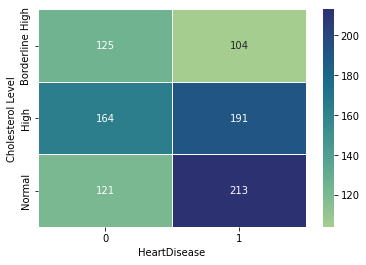

In [42]:
#Heatmap to see correlation of cholesterol level and heart disease
sns.heatmap(data=pd.crosstab(df["Cholesterol Level"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()

# Q6: Does higher blood pressure can lead to heart disease?

In [43]:
#Check variables in resting BP group
df["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [44]:
#Counts of total zero in resting BP group
count_zero_value_restingBP=(df['RestingBP']==0).sum()
count_zero_value_restingBP

1

In [45]:
#Calculate mean of the cholesterol
df["RestingBP"].mean()

132.39651416122004

In [46]:
#Create a new column to determine hypertension level
def_restingBP=[]
for restingBP in df["RestingBP"]:
    if restingBP >140:
        def_restingBP.append("Hypertension")
    else:
        def_restingBP.append("Normal")

df["Hypertension"]=def_restingBP
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol Level,Hypertension
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,High,Normal
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Normal,Hypertension
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,High,Normal
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Borderline High,Normal
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Normal,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,High,Normal
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,Normal,Hypertension
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,Normal,Normal
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,Borderline High,Normal


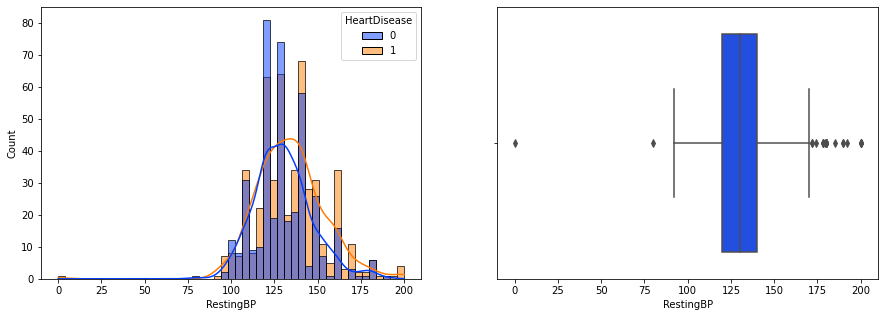

In [47]:
# Compare blood pressure and Heart disease
fig_blood_pressure_heart_disease, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",kde=True,ax=axes[0],palette="bright")
sns.boxplot(x=df["RestingBP"],ax=axes[1],palette="bright")
plt.show()

In [48]:
#To Check correlation coefficient by applying Point biserial’s correlation
y3 = df["RestingBP"].tolist()
x3 = df["HeartDisease"].tolist()

stats.pointbiserialr(x=x3, y=y3)

PointbiserialrResult(correlation=0.10758898037140391, pvalue=0.001095314585171513)

In [49]:
#Scatterplot & boxplot to see the correlation
fig_restingBP_box_plot=px.box(df, x="HeartDisease", y="RestingBP", points="all",width=800, height=500)
fig_restingBP_box_plot.show()

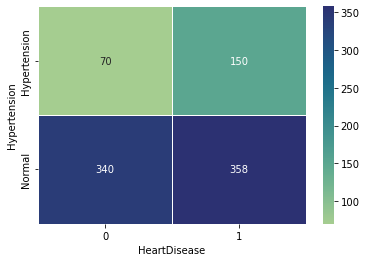

In [50]:
#Heatmap to see correlation of hypertension and heart disease
sns.heatmap(data=pd.crosstab(df["Hypertension"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()

# Q7: Does higher blood sugar can lead to heart disease?

In [51]:
#Check variables in resting BP group
df["FastingBS"].unique()

array([0, 1], dtype=int64)

In [52]:
#To Check correlation coefficient by applying Tetrachoric method by applying matthews correlation coefficient
y4= df["FastingBS"].tolist()
x4 = df["HeartDisease"].tolist()
matthews_corrcoef(y_true=x4,y_pred=y4)

0.26729118611029806

In [53]:
# To replace variable from 0 as normal and 1 as diabetes
for diabetes in df["FastingBS"]:
    df["FastingBS"]=df["FastingBS"].replace(0,"Normal")
    df["FastingBS"]=df["FastingBS"].replace(1,"Diabetes")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol Level,Hypertension
0,40,M,ATA,140,289.0,Normal,Normal,172,N,0.0,Up,0,High,Normal
1,49,F,NAP,160,180.0,Normal,Normal,156,N,1.0,Flat,1,Normal,Hypertension
2,37,M,ATA,130,283.0,Normal,ST,98,N,0.0,Up,0,High,Normal
3,48,F,ASY,138,214.0,Normal,Normal,108,Y,1.5,Flat,1,Borderline High,Normal
4,54,M,NAP,150,195.0,Normal,Normal,122,N,0.0,Up,0,Normal,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,Normal,Normal,132,N,1.2,Flat,1,High,Normal
914,68,M,ASY,144,193.0,Diabetes,Normal,141,N,3.4,Flat,1,Normal,Hypertension
915,57,M,ASY,130,131.0,Normal,Normal,115,Y,1.2,Flat,1,Normal,Normal
916,57,F,ATA,130,236.0,Normal,LVH,174,N,0.0,Flat,1,Borderline High,Normal


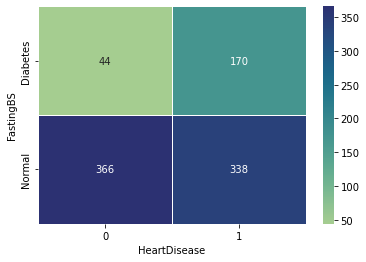

In [54]:
#Heatmap to see correlation of diabetes and heart disease
sns.heatmap(data=pd.crosstab(df["FastingBS"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()

# Q8: Does higher Max HR can lead to heart disease?


In [55]:
#Check variables in Max HR group
df["MaxHR"].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

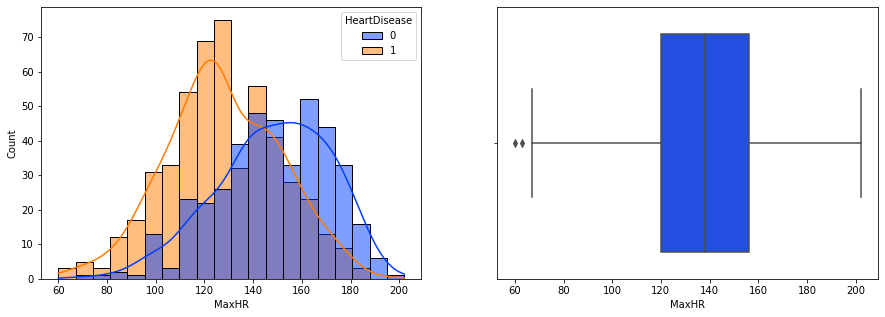

In [56]:
# Compare max HR and Heart disease
fig_max_HR_heart_disease, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",kde=True,ax=axes[0],palette="bright")
sns.boxplot(x=df["MaxHR"],ax=axes[1],palette="bright")
plt.show()

In [57]:
#To Check correlation coefficient by applying Point biserial’s correlation
y5 = df["MaxHR"].tolist()
x5 = df["HeartDisease"].tolist()

stats.pointbiserialr(x=x5, y=y5)

PointbiserialrResult(correlation=-0.4004207694631897, pvalue=1.1377859840272116e-36)

In [58]:
#Scatterplot & boxplot to see the correlation
fig_maxHR_box_plot=px.box(df, x="HeartDisease", y="MaxHR", points="all",width=800, height=500)
fig_maxHR_box_plot.show()

# Q9: Can Type of Resting ECG detect heart disease?

In [59]:
#Check variables in Resting ECG group
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [60]:
#Total Heart Disease filtered by type of resting ECG
fig_heart_disease_by_ECGtype = px.histogram(df, x="RestingECG",color="HeartDisease",title="Number of Heart Disease Filtered By Resting ECG Type",text_auto=True, width=500, height=600,barmode="group")
fig_heart_disease_by_ECGtype.update_layout(bargap=0.1)
fig_heart_disease_by_ECGtype.update_xaxes(nticks=5)
fig_heart_disease_by_ECGtype.update_traces(textposition="outside")
fig_heart_disease_by_ECGtype.show()
# Normal - normal resting ECG
# ST - having ST or T wave abnormality
# LVH - left ventricle hypertrophy

In [61]:
#Pie Chart of resting ECG type that contribute heart disease in %
figpie_ECG = px.pie(df_HeartDisease_1,names="RestingECG",title="Resting ECG Type Contribute Heart Disease",category_orders={"RestingECG":["Normal","ST","LVH"]},width=600, height=600)
figpie_ECG.update_traces(textposition='inside', textinfo='percent+value')
figpie_ECG.show()
# Normal - normal resting ECG
# ST - having ST or T wave adnormality
# LVH - left ventricle hypertrophy

In [62]:
#Pie Chart of resting ECG type that contribute heart disease in %
figpie_ECG_2 = px.pie(df_HeartDisease_0,names="RestingECG",title="Resting ECG Type that didnt contribute Heart Disease",category_orders={"RestingECG":["Normal","ST","LVH"]},width=600, height=600)
figpie_ECG_2.update_traces(textposition='inside', textinfo='percent+value')
figpie_ECG_2.show()
# Normal - normal resting ECG
# ST - having ST or T wave adnormality
# LVH - left ventricle hypertrophy

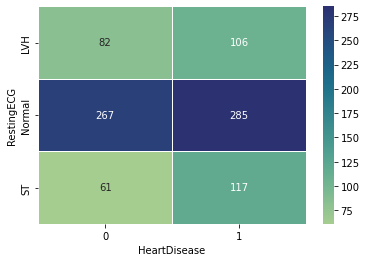

In [63]:
#Heatmap to see correlation of type of resting ECG and heart disease
sns.heatmap(data=pd.crosstab(df["RestingECG"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()

# Q10: Can Exercise Angina can detect heart disease?

In [64]:
#Check variables in Exercise Angina group
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [65]:
#Total Heart Disease filtered by the presence of exercise angina
fig_heart_disease_by_exerciseangina = px.histogram(df, x="ExerciseAngina",color="HeartDisease",title="Number of Heart Disease Filtered By Presence of Exercise Angina",text_auto=True, width=600, height=600,barmode="group")
fig_heart_disease_by_exerciseangina.update_layout(bargap=0.1)
fig_heart_disease_by_exerciseangina.update_xaxes(nticks=5)
fig_heart_disease_by_exerciseangina.update_traces(textposition="outside")
fig_heart_disease_by_exerciseangina.show()

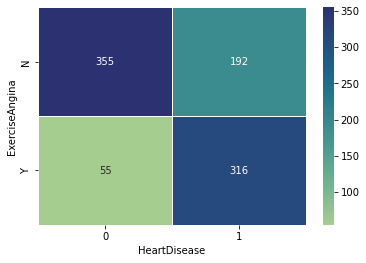

In [66]:
#Heatmap to see correlation of presence of exercise angina and heart disease
sns.heatmap(data=pd.crosstab(df["ExerciseAngina"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()

# Q11: Can ST Slope after exercise can detect heart disease?

In [67]:
#Check variables in ST Slope group
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [68]:
#Total Heart Disease filtered by ST slope
fig_heart_disease_by_st_slope = px.histogram(df, x="ST_Slope",color="HeartDisease",title="Number of Heart Disease Filtered By ST Slope",text_auto=True, width=500, height=600,barmode="group")
fig_heart_disease_by_st_slope.update_layout(bargap=0.1)
fig_heart_disease_by_st_slope.update_xaxes(nticks=5)
fig_heart_disease_by_st_slope.update_traces(textposition="outside")
fig_heart_disease_by_st_slope.show()

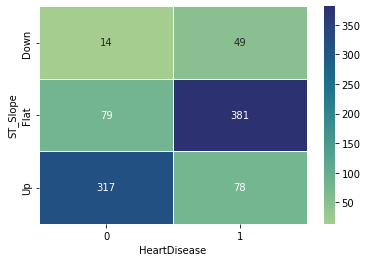

In [69]:
#Heatmap to see correlation of ST Slope and heart disease
sns.heatmap(data=pd.crosstab(df["ST_Slope"], df["HeartDisease"]), annot=True, fmt="d",cmap="crest",linewidths=.5)
plt.show()